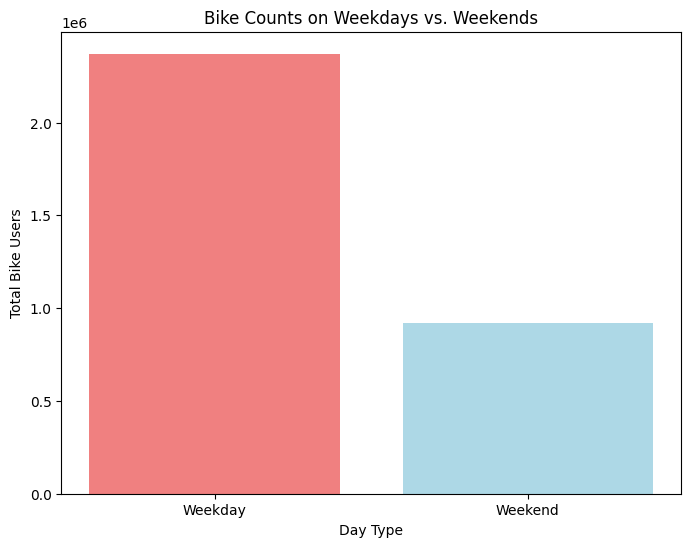

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

url = "hour.csv\\hour.csv"  # Replace with the actual URL or file path
df = pd.read_csv(url)

# Assuming df is your DataFrame
# Convert 'dteday' column to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

# Create a new column 'day_type' to indicate weekend or weekday
df['day_type'] = df['dteday'].dt.day_name()
df['day_type'] = df['day_type'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Count of bikes during weekdays and weekends
day_type_counts = df.groupby('day_type')['cnt'].sum()

# Plotting the counts
plt.figure(figsize=(8, 6))
plt.bar(day_type_counts.index, day_type_counts, color=['lightcoral', 'lightblue'])
plt.title('Bike Counts on Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Total Bike Users')
plt.show()


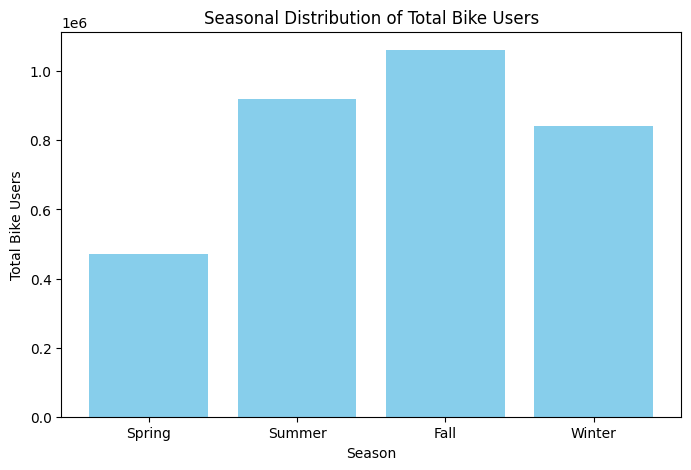

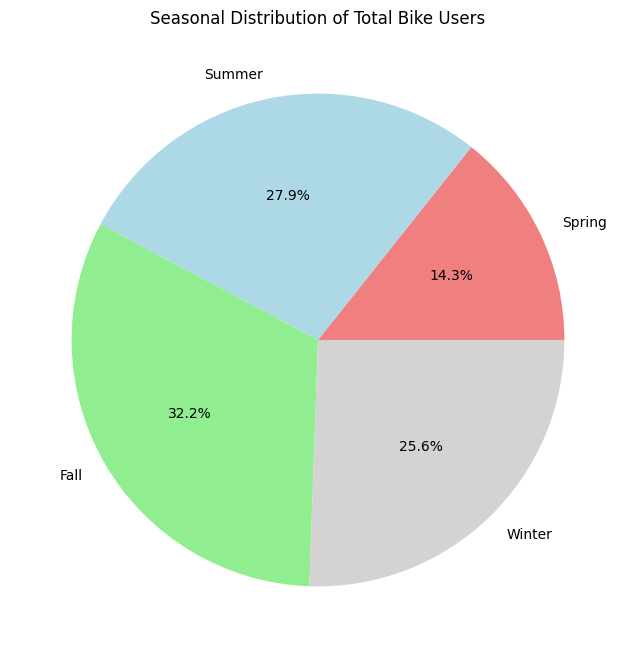

In [2]:

seasonal_counts = df.groupby('season')['cnt'].sum()

plt.figure(figsize=(8, 5))
plt.bar(seasonal_counts.index, seasonal_counts, color='skyblue')
plt.title('Seasonal Distribution of Total Bike Users')
plt.xlabel('Season')
plt.ylabel('Total Bike Users')
plt.xticks(seasonal_counts.index, ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()
    
seasonal_counts1 = df.groupby('season')['cnt'].sum()

plt.figure(figsize=(8, 8))
plt.pie(seasonal_counts, labels=['Spring', 'Summer', 'Fall', 'Winter'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'lightgray'])
plt.title('Seasonal Distribution of Total Bike Users')
plt.show()

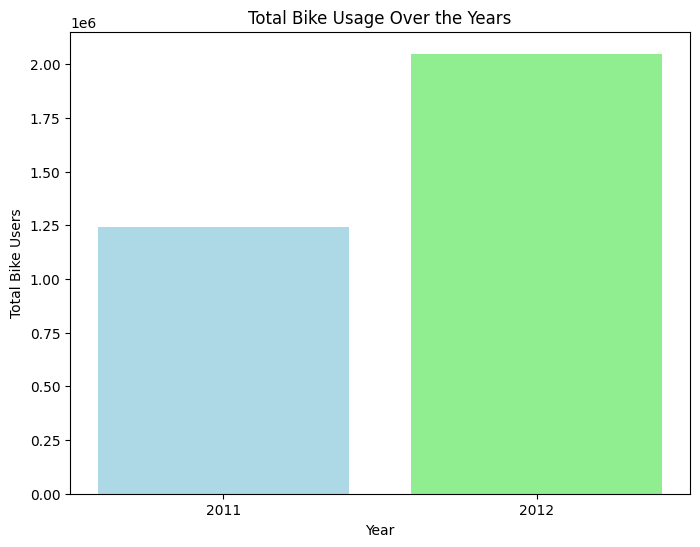

In [3]:
yearly_counts = df.groupby('yr')['cnt'].sum()

plt.figure(figsize=(8, 6))
plt.bar(yearly_counts.index, yearly_counts, color=['lightblue', 'lightgreen'])
plt.title('Total Bike Usage Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Bike Users')
plt.xticks(yearly_counts.index, ['2011', '2012'])
plt.show()


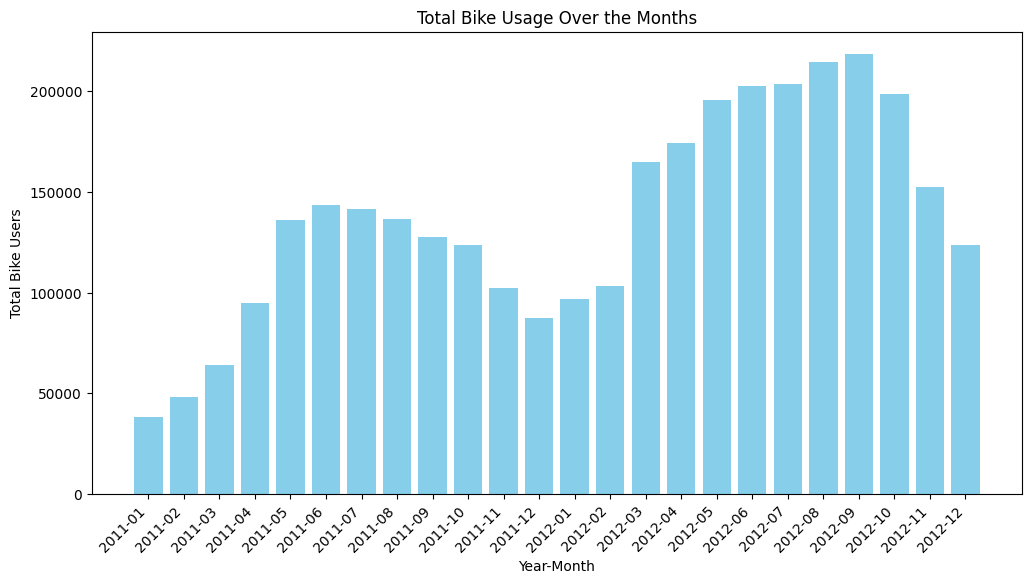

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Load the dataset
    url = "hour.csv\\hour.csv"  
    df = pd.read_csv(url)


    # Call the monthly function
    monthly(df)

def monthly(df):
    # Extracting year and month from the 'dteday' column
    df['year_month'] = pd.to_datetime(df['dteday']).dt.to_period('M')

    # Plotting example: Monthly distribution of total bike users over multiple years
    monthly_counts = df.groupby('year_month')['cnt'].sum()

    plt.figure(figsize=(12, 6))
    plt.bar(monthly_counts.index.astype(str), monthly_counts, color='skyblue')
    plt.title('Total Bike Usage Over the Months')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Bike Users')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

if __name__ == "__main__":
    main()


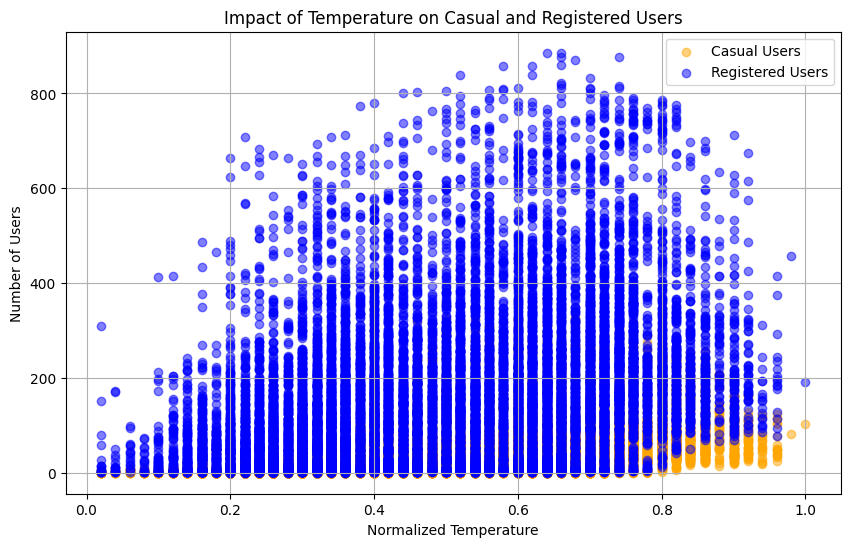

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['casual'], alpha=0.5, color='orange', label='Casual Users')
plt.scatter(df['temp'], df['registered'], alpha=0.5, color='blue', label='Registered Users')
plt.title('Impact of Temperature on Casual and Registered Users')
plt.xlabel('Normalized Temperature')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()


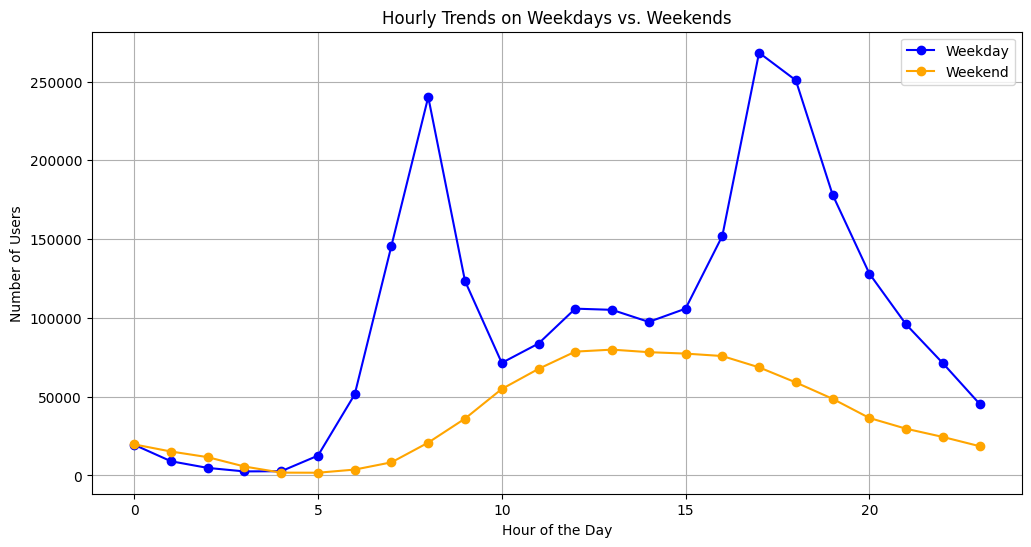

In [6]:
weekday_hourly = df[df['day_type'] == 'Weekday'].groupby('hr')['cnt'].sum()
weekend_hourly = df[df['day_type'] == 'Weekend'].groupby('hr')['cnt'].sum()

plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly, marker='o', linestyle='-', color='blue', label='Weekday')
plt.plot(weekend_hourly, marker='o', linestyle='-', color='orange', label='Weekend')
plt.title('Hourly Trends on Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()


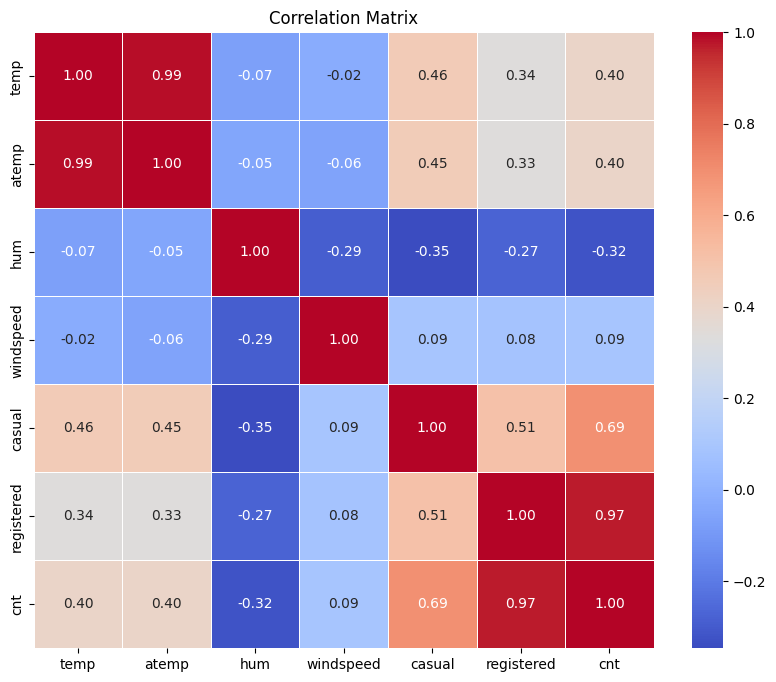

In [15]:
import seaborn as sns
corr_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<Figure size 1200x600 with 0 Axes>

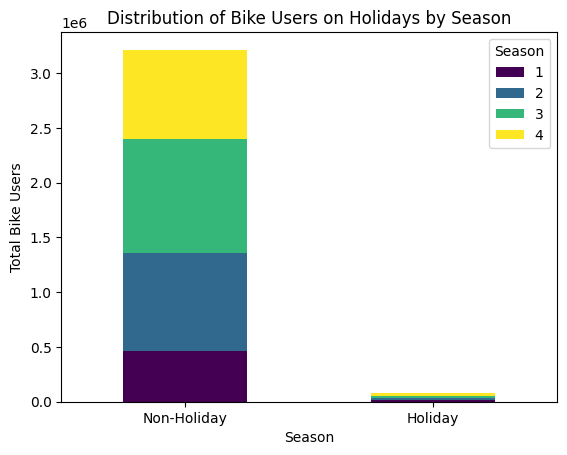

In [18]:
holiday_season_counts = df.groupby(['holiday', 'season'])['cnt'].sum().unstack()

plt.figure(figsize=(12, 6))
holiday_season_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Bike Users on Holidays by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Users')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.legend(title='Season', loc='upper right')
plt.show()


C:\Users\amank\AppData\Local\Temp\ipykernel_13808\1798777159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=df, palette='pastel')


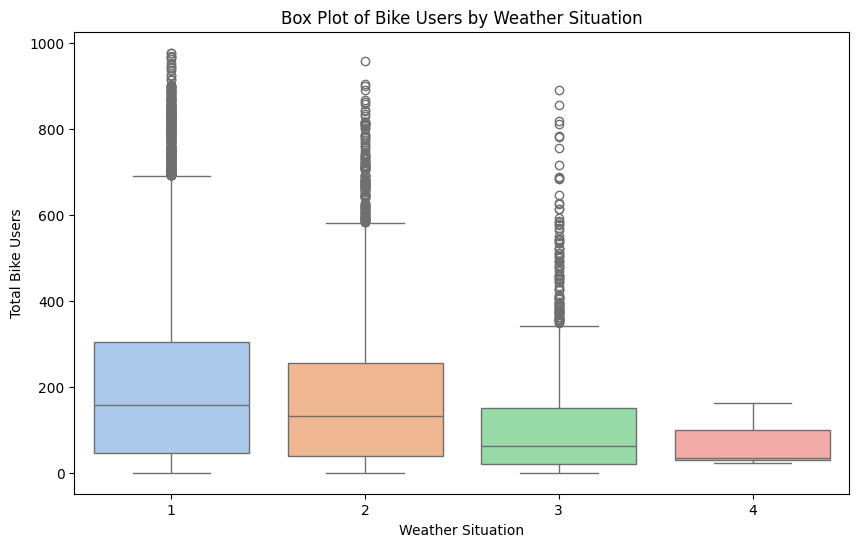

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df, palette='pastel')
plt.title('Box Plot of Bike Users by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Users')
plt.show()


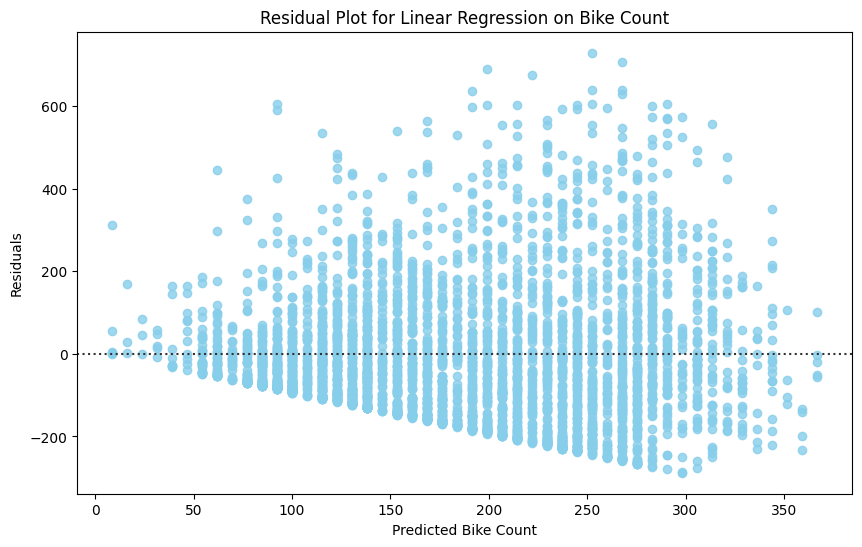

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'temp' is used as a predictor
X = df[['temp']]
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_test), y=y_test, color='skyblue')
plt.title('Residual Plot for Linear Regression on Bike Count')
plt.xlabel('Predicted Bike Count')
plt.ylabel('Residuals')
plt.show()


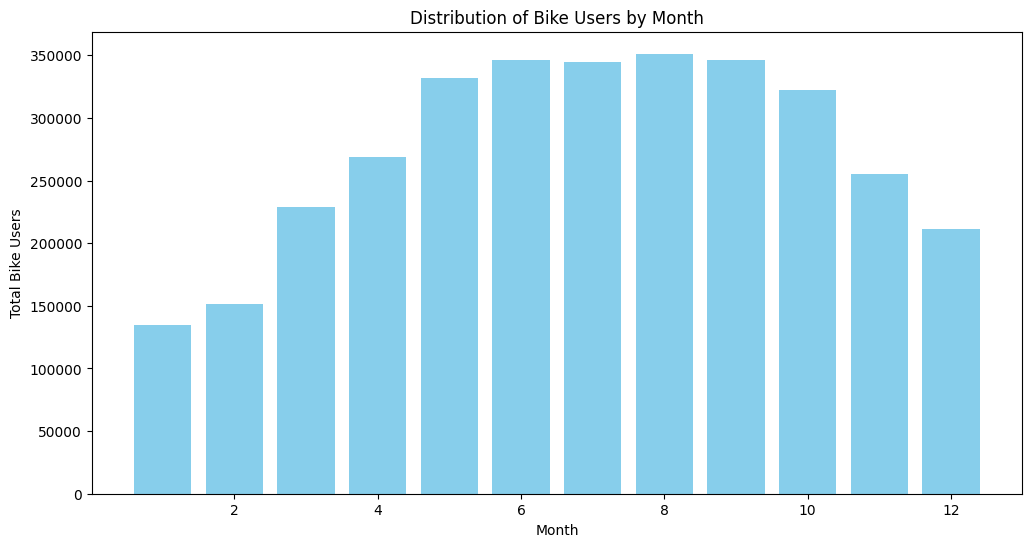

In [15]:
monthly_user_counts = df.groupby('mnth')['cnt'].sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_user_counts.index, monthly_user_counts, color='skyblue')
plt.title('Distribution of Bike Users by Month')
plt.xlabel('Month')
plt.ylabel('Total Bike Users')
plt.show()


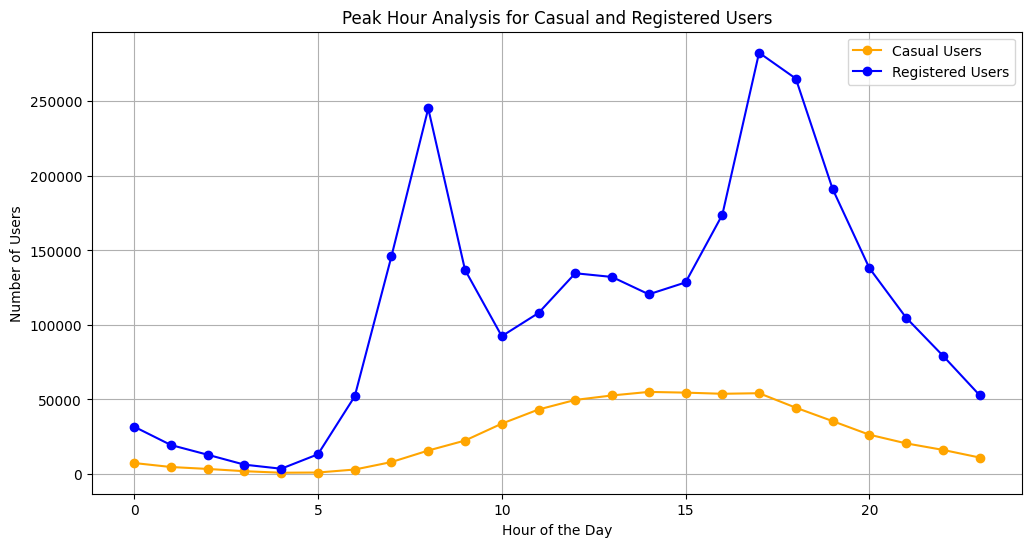

In [16]:
peak_hour_casual = df.groupby('hr')['casual'].sum()
peak_hour_registered = df.groupby('hr')['registered'].sum()

plt.figure(figsize=(12, 6))
plt.plot(peak_hour_casual, marker='o', linestyle='-', color='orange', label='Casual Users')
plt.plot(peak_hour_registered, marker='o', linestyle='-', color='blue', label='Registered Users')
plt.title('Peak Hour Analysis for Casual and Registered Users')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()


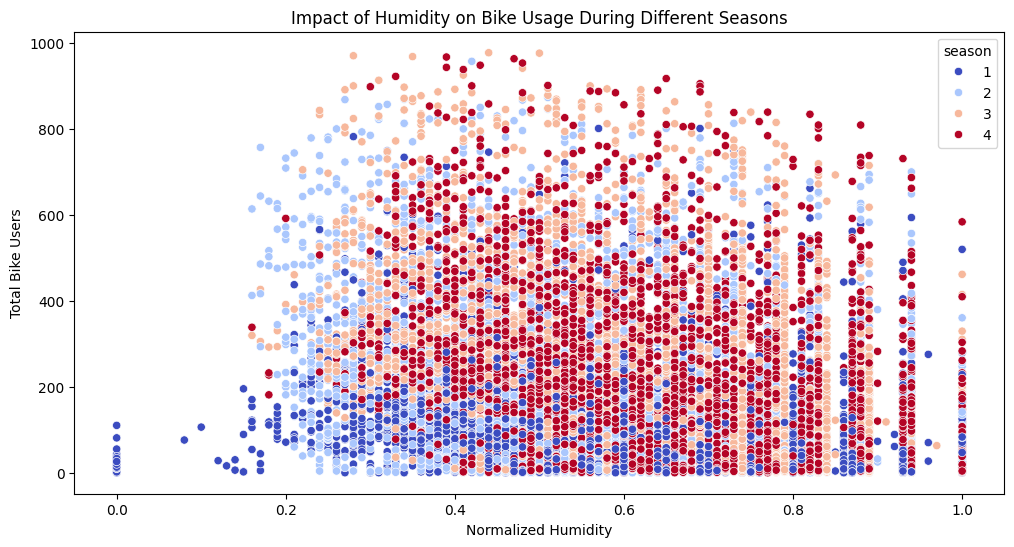

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hum', y='cnt', hue='season', data=df, palette='coolwarm')
plt.title('Impact of Humidity on Bike Usage During Different Seasons')
plt.xlabel('Normalized Humidity')
plt.ylabel('Total Bike Users')
plt.show()


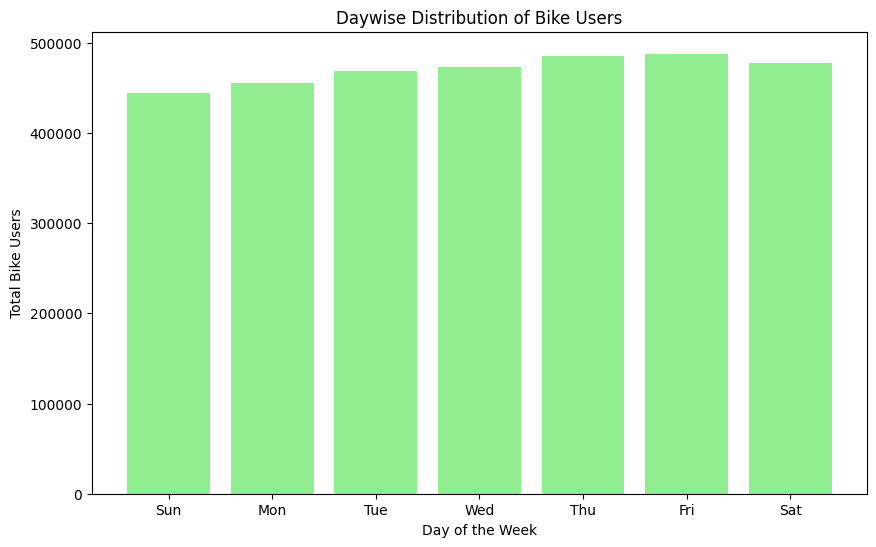

In [18]:
daywise_counts = df.groupby('weekday')['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.bar(daywise_counts.index, daywise_counts, color='lightgreen')
plt.title('Daywise Distribution of Bike Users')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Users')
plt.xticks(daywise_counts.index, ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()


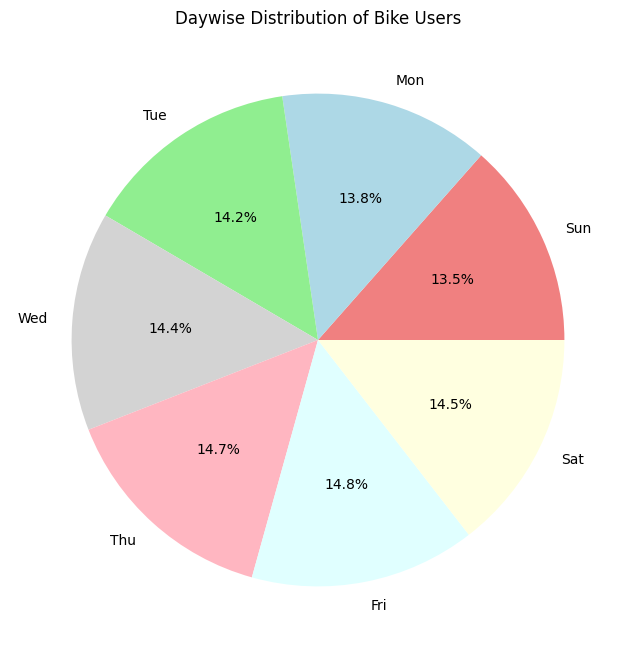

In [19]:
daywise_counts = df.groupby('weekday')['cnt'].sum()

plt.figure(figsize=(8, 8))
plt.pie(daywise_counts, labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'lightgray', 'lightpink', 'lightcyan', 'lightyellow'])
plt.title('Daywise Distribution of Bike Users')
plt.show()


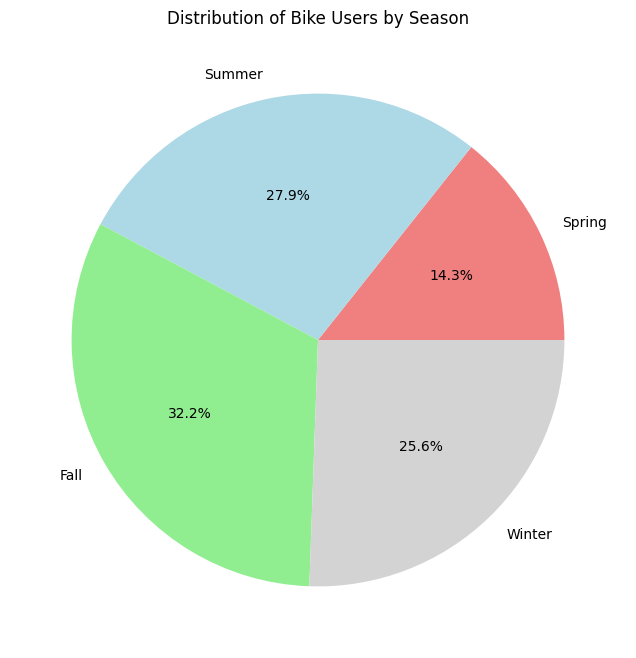

In [20]:
season_counts = df.groupby('season')['cnt'].sum()

plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=['Spring', 'Summer', 'Fall', 'Winter'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'lightgray'])
plt.title('Distribution of Bike Users by Season')
plt.show()


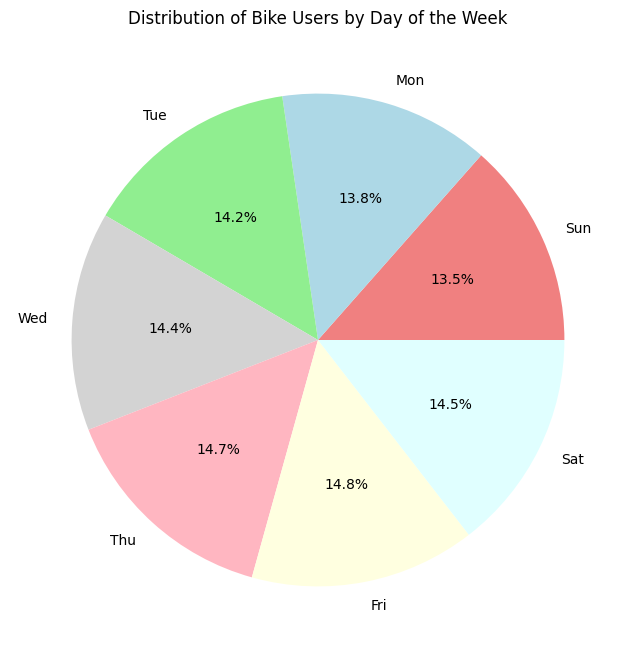

In [21]:
daywise_counts = df.groupby('weekday')['cnt'].sum()

plt.figure(figsize=(8, 8))
plt.pie(daywise_counts, labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'lightgray', 'lightpink', 'lightyellow', 'lightcyan'])
plt.title('Distribution of Bike Users by Day of the Week')
plt.show()


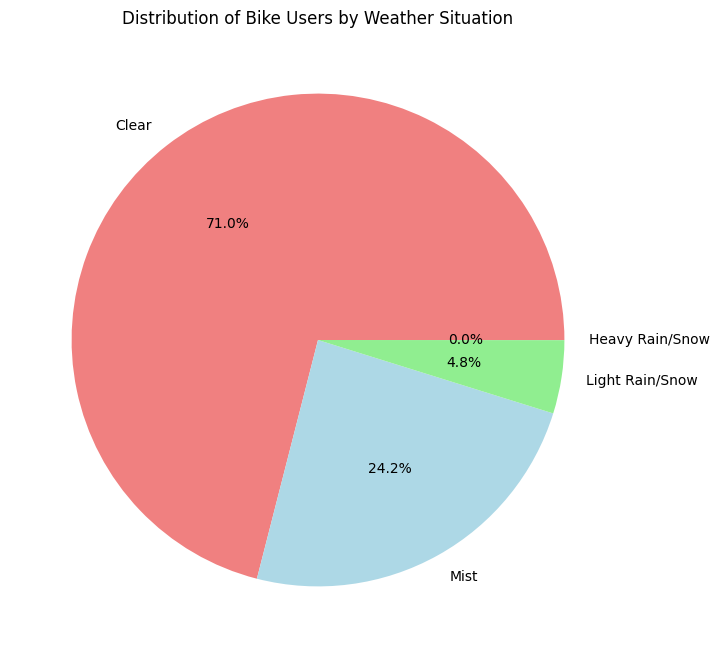

In [22]:
weather_counts = df.groupby('weathersit')['cnt'].sum()

plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'lightgray'])
plt.title('Distribution of Bike Users by Weather Situation')
plt.show()


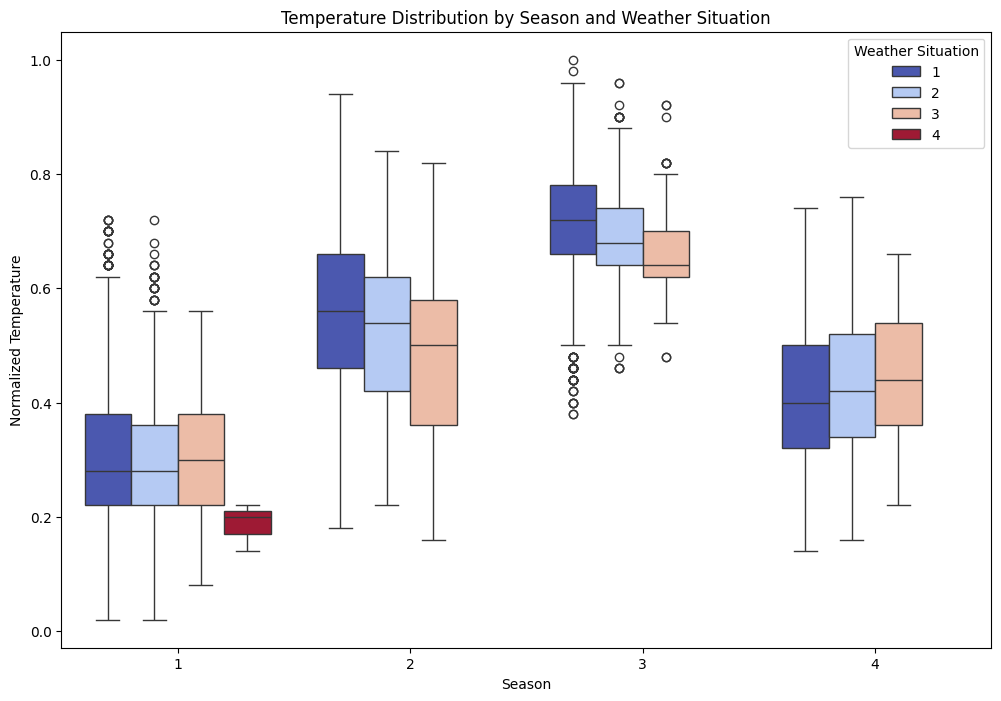

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='season', y='temp', data=df, hue='weathersit', palette='coolwarm')
plt.title('Temperature Distribution by Season and Weather Situation')
plt.xlabel('Season')
plt.ylabel('Normalized Temperature')
plt.legend(title='Weather Situation', loc='upper right')
plt.show()





C:\Users\amank\AppData\Local\Temp\ipykernel_13808\3153253600.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='weekday', y='cnt', hue='season', data=df, ci=None, palette='muted')


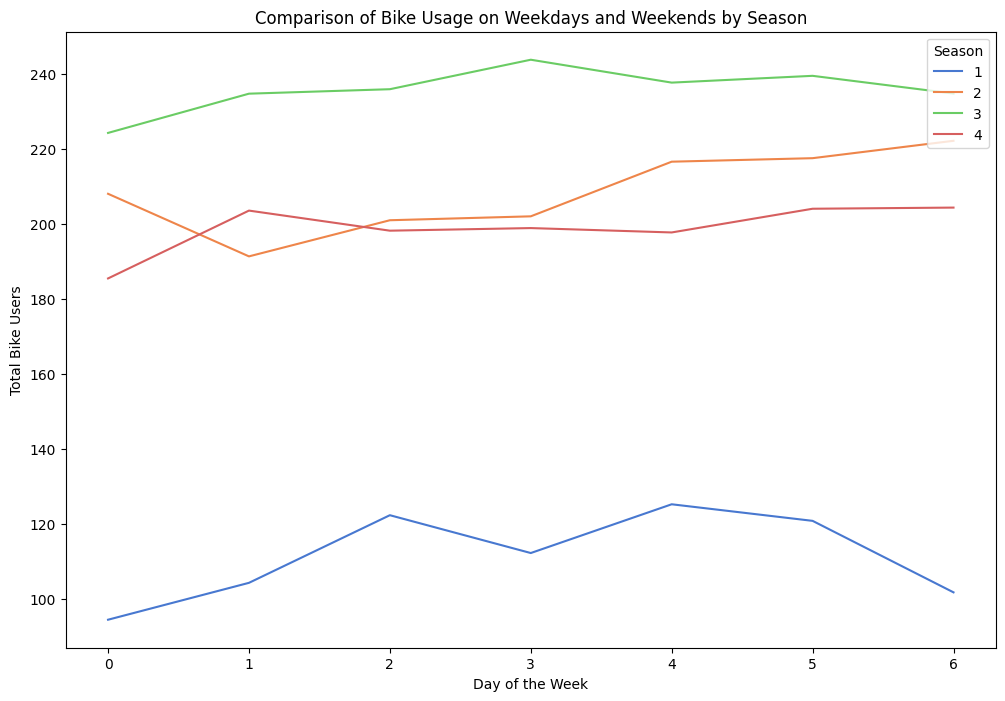

In [29]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='weekday', y='cnt', hue='season', data=df, ci=None, palette='muted')
plt.title('Comparison of Bike Usage on Weekdays and Weekends by Season')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Users')
plt.legend(title='Season', loc='upper right')
plt.show()



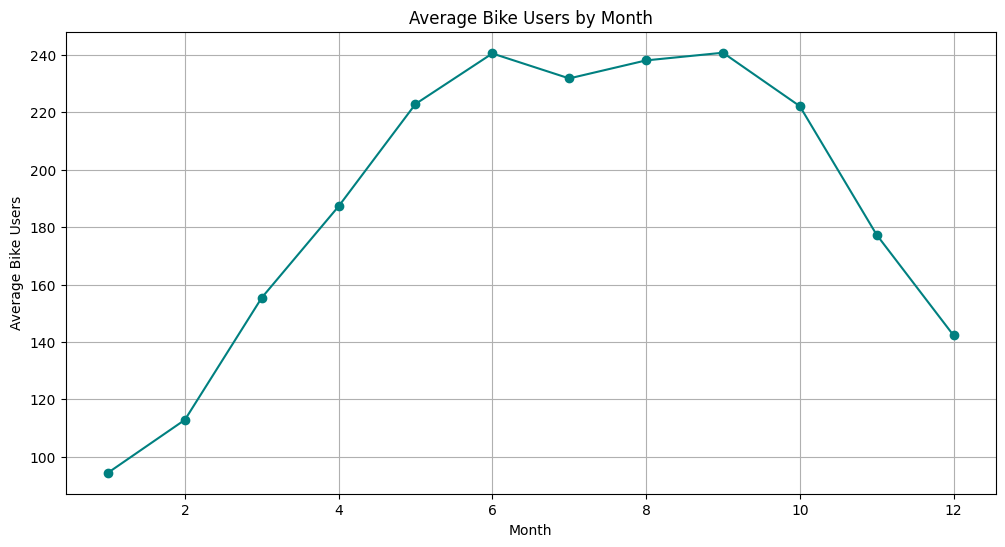

In [30]:
monthly_avg = df.groupby('mnth')['cnt'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg, marker='o', linestyle='-', color='teal')
plt.title('Average Bike Users by Month')
plt.xlabel('Month')
plt.ylabel('Average Bike Users')
plt.grid(True)
plt.show()


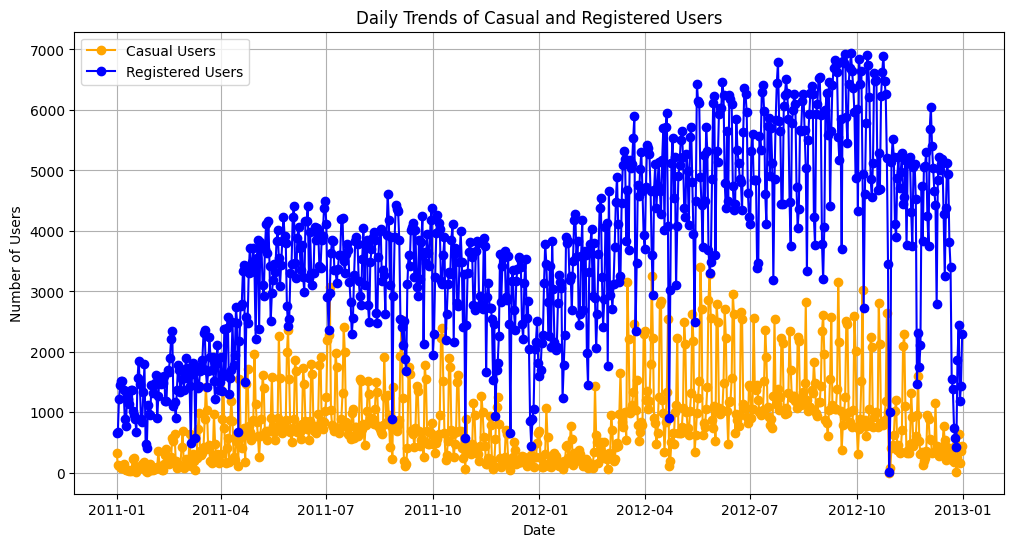

In [49]:
daily_casual = df.groupby('dteday')['casual'].sum()
daily_registered = df.groupby('dteday')['registered'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_casual, marker='o', linestyle='-', color='orange', label='Casual Users')
plt.plot(daily_registered, marker='o', linestyle='-', color='blue', label='Registered Users')
plt.title('Daily Trends of Casual and Registered Users')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()



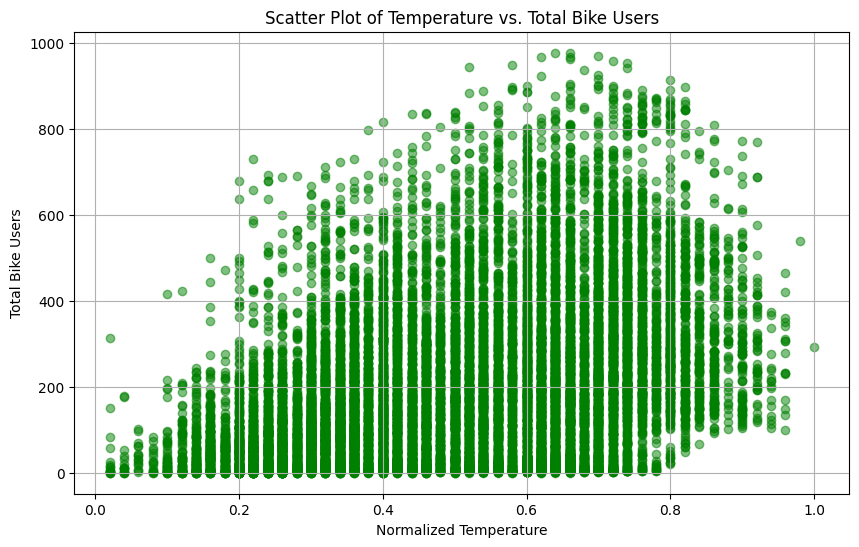

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['cnt'], alpha=0.5, color='green')
plt.title('Scatter Plot of Temperature vs. Total Bike Users')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Bike Users')
plt.grid(True)
plt.show()


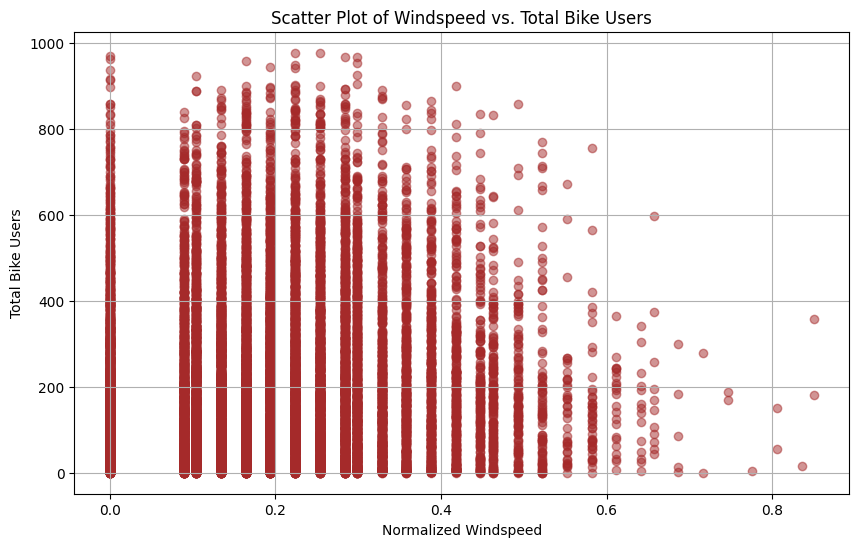

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df['windspeed'], df['cnt'], alpha=0.5, color='brown')
plt.title('Scatter Plot of Windspeed vs. Total Bike Users')
plt.xlabel('Normalized Windspeed')
plt.ylabel('Total Bike Users')
plt.grid(True)
plt.show()


C:\Users\amank\AppData\Local\Temp\ipykernel_18720\385391821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df, palette='pastel')


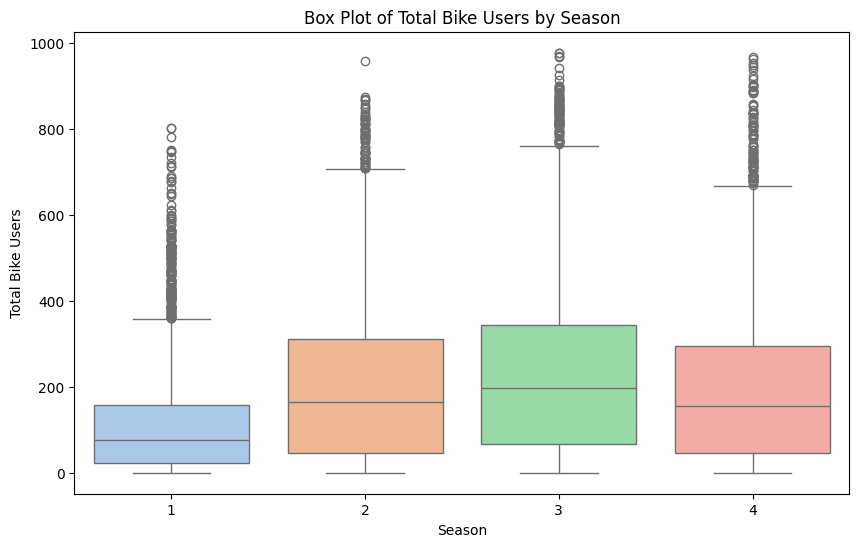

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df, palette='pastel')
plt.title('Box Plot of Total Bike Users by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Users')
plt.show()


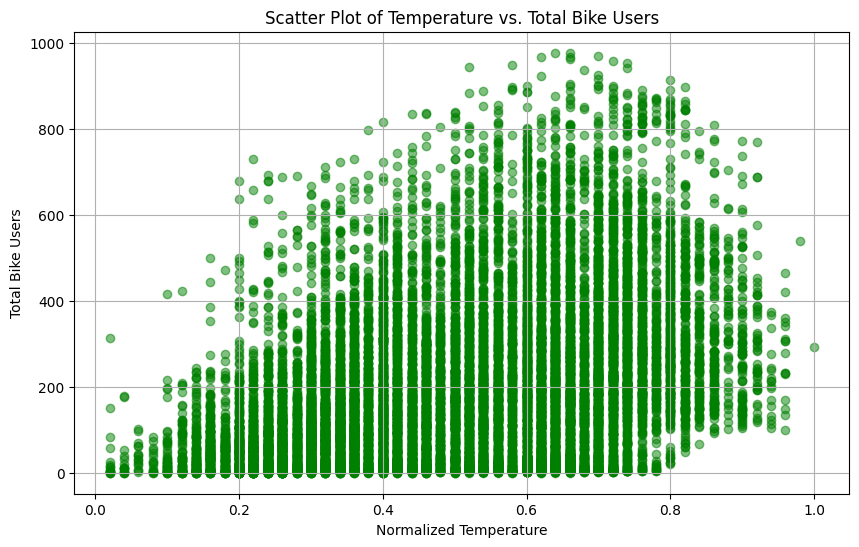

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['cnt'], alpha=0.5, color='green')
plt.title('Scatter Plot of Temperature vs. Total Bike Users')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Bike Users')
plt.grid(True)
plt.show()
  